In [1]:
import numpy as np
import pandas as pd


#r"C:\Users\Ryan\Desktop\ECE 219\ml-latest-small/ratings.csv"


ratings = pd.read_csv(r"C:\Users\Ryan\Desktop\ECE 219\ml-latest-small/ratings.csv")

print(ratings)

#build rating matrix?
# movie id --->   . . . (last col rating)
#user id going down

R_dataframe = ratings.pivot_table('rating', 'userId', 'movieId', fill_value=0)

#print(R_dataframe.head())

total_available_rating = len(ratings)
print(R_dataframe.shape)
total_possible_ratings = 610 * 9724
sparsity = total_available_rating / total_possible_ratings

print('Sparsity = ' +str(sparsity))

        userId  movieId  rating   timestamp
0            1        1     4.0   964982703
1            1        3     4.0   964981247
2            1        6     4.0   964982224
3            1       47     5.0   964983815
4            1       50     5.0   964982931
...        ...      ...     ...         ...
100831     610   166534     4.0  1493848402
100832     610   168248     5.0  1493850091
100833     610   168250     5.0  1494273047
100834     610   168252     5.0  1493846352
100835     610   170875     3.0  1493846415

[100836 rows x 4 columns]
(610, 9724)
Sparsity = 0.016999683055613623


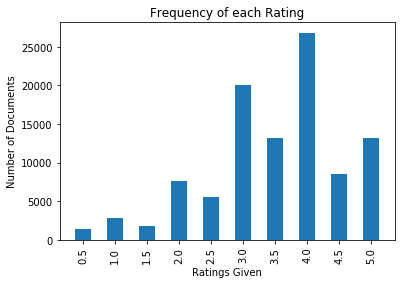

In [38]:
#question 2

from matplotlib import pyplot as plt


R_matrix = R_dataframe.astype('int')
ratings_numbers = [0.5, 1.0, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5]

#need 5.5 to include 5 on the edge of the plot
ratings_axis = [0.5, 1.0, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5.0, 5.5]

plt.title("Frequency of each Rating")
plt.xticks(ticks=ratings_numbers, rotation='vertical')
plt.xlabel("Ratings Given")
#plt.yticks(np.arange(0,701,100))
plt.ylabel("Number of Documents")
#plt.bar(unique_categories, counts, align='center', tick_label=train_dataset.target_names)
plt.hist(ratings.rating, bins=ratings_axis, align='left', rwidth=0.5)

plt.show()



movieId
1         214
2         109
3          51
4           7
5          48
         ... 
193581      1
193583      1
193585      1
193587      1
193609      1
Length: 9724, dtype: int64


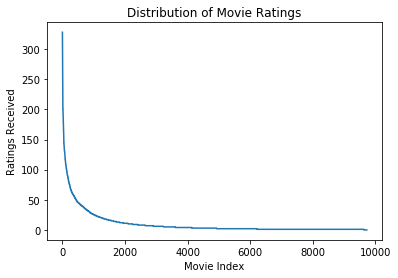

In [24]:
#question 3 - distribution of ratings among movies

movie_ratings_count = np.sum(R_matrix!=0, axis=0)

print(movie_ratings_count)

sorted_ratings = np.sort(movie_ratings_count)[::-1]


plt.plot(sorted_ratings)
plt.xlabel("Movie Index")
plt.ylabel("Ratings Received")
plt.title("Distribution of Movie Ratings")
plt.show()



movieId  1       2       3       4       5       6       7       8       \
userId                                                                    
1             4       0       4       0       0       4       0       0   
2             0       0       0       0       0       0       0       0   
3             0       0       0       0       0       0       0       0   
4             0       0       0       0       0       0       0       0   
5             4       0       0       0       0       0       0       0   
...         ...     ...     ...     ...     ...     ...     ...     ...   
606           2       0       0       0       0       0       2       0   
607           4       0       0       0       0       0       0       0   
608           2       2       2       0       0       0       0       0   
609           3       0       0       0       0       0       0       0   
610           5       0       0       0       0       5       0       0   

movieId  9       10     

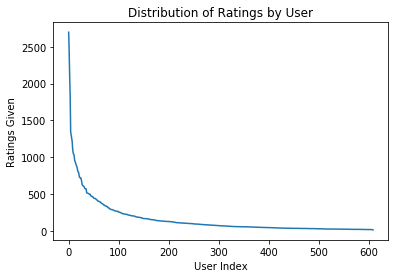

In [29]:
#question 4 - distribution of ratings among users
print(R_matrix)

user_ratings_count = np.sum(R_matrix!=0, axis=1)

print(user_ratings_count)

sorted_ratings = np.sort(user_ratings_count)[::-1]


plt.plot(sorted_ratings)
plt.xlabel("User Index")
plt.ylabel("Ratings Given")
plt.title("Distribution of Ratings by User")
plt.show()

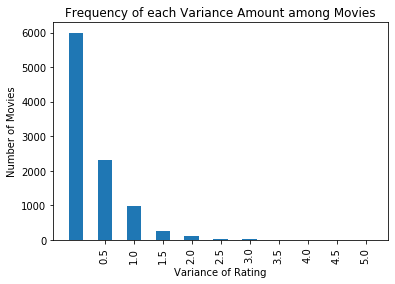

In [36]:
#question 5 - explain in report
#question 6 - compute variance of rating values received by each movie, plot variance



R_dataframe_var = ratings.pivot_table('rating', 'userId', 'movieId')
movie_rating_var = np.var(R_dataframe_var,axis=0)

ratings_axis_var = [0, 0.5, 1.0, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5.0, 5.5]


plt.title("Frequency of each Variance Amount among Movies")
plt.xticks(ticks=ratings_numbers, rotation='vertical')
plt.xlabel("Variance of Rating")
plt.ylabel("Number of Movies")
#plt.bar(unique_categories, counts, align='center', tick_label=train_dataset.target_names)
plt.hist(movie_rating_var, bins=ratings_axis_var, align='left', rwidth=0.5)

plt.show()

In [32]:
# question 7
# question 8
# question 9

#explain in report

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [47]:
# question 10
from surprise import Dataset
from surprise import Reader
from surprise.model_selection.validation  import cross_validate
from surprise.prediction_algorithms.knns import KNNWithMeans

reader = Reader(line_format='user item rating', sep=',',skip_lines=1, rating_scale=(0.5, 5))
data = Dataset.load_from_file(r"C:\Users\Ryan\Desktop\ECE 219\ml-latest-small/ratings.csv", reader=reader)

RMSE = []
MAE = []

for k in range(2,101,2):
    knn = KNNWithMeans(k=k, sim_options = {'name': 'pearson'})
    cv = cross_validate(knn, data, measures=['RMSE','MAE'],cv=10, verbose=False)
    RMSE.append(np.mean(cv['test_rmse']))
    MAE.append(np.mean(cv['test_mae']))

Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.

Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...

Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.

Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...

Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.

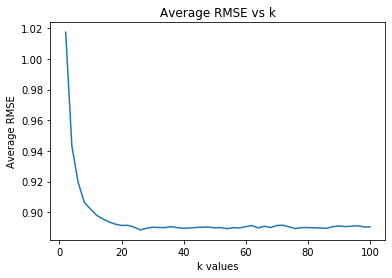

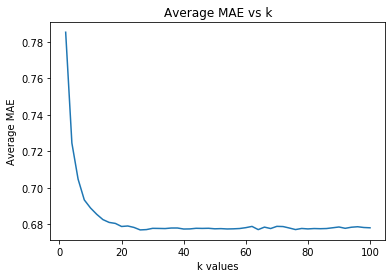

Minimum K for RMSE is: 18
Steady state value for RMSE is: 0.8913882609855349
Minimum K for MAE is: 28
Steady state value for MAE is: 0.6777827227865071


In [88]:
k_axis = range(2,101,2)
plt.plot(k_axis, RMSE)
plt.title("Average RMSE vs k")
plt.xlabel("k values")
plt.ylabel("Average RMSE")
plt.show()

plt.plot(k_axis, MAE)
plt.title("Average MAE vs k")
plt.xlabel("k values")
plt.ylabel("Average MAE")
plt.show()

#find minimum k and steady state values - question 11
RMSE_min_k = 2
MAE_min_k = 2

for k in range(1, 49):
    if(abs(RMSE[k] - RMSE[k+1]) < 0.0001):
        RMSE_min_k = k
        break
        
for k in range(1, 49):
    if(abs(MAE[k] - MAE[k+1]) < 0.0001):
        MAE_min_k = k
        break
        
RMSE_steady_state = RMSE[RMSE_min_k]
print("Minimum K for RMSE is: " +str(2*RMSE_min_k))
print("Steady state value for RMSE is: " +str(RMSE_steady_state))

MAE_steady_state = MAE[MAE_min_k]
print("Minimum K for MAE is: " +str(2*MAE_min_k))
print("Steady state value for MAE is: " +str(MAE_steady_state))


In [90]:
#question 11 alternative
#or just eyeball k = 20 or 22
RMSE_steady_state = RMSE[10]
print("Minimum K for RMSE is: " +str(20))
print("Steady state value for RMSE is: " +str(RMSE_steady_state))

MAE_steady_state = MAE[20]
print("Minimum K for MAE is: " +str(20))
print("Steady state value for MAE is: " +str(MAE_steady_state))

Minimum K for RMSE is: 20
Steady state value for RMSE is: 0.8914523611543306
Minimum K for MAE is: 20
Steady state value for MAE is: 0.6774651435929393


In [ ]:
#question 12